In [81]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
#!pip install citipy
from pprint import pprint
import random
from citipy import citipy
import numpy as np
import seaborn as sns
import gmaps



In [2]:
#open file with country codes
#need to run below code in console to increase limit to perform
#list compilation 
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
cityID = []


f= open("CityID.json", encoding="utf8")
data = json.loads(f.read())
for i in data:
    cityID.append(i)
    


In [24]:
#converting to data frame to isolate country IDs
df = pd.DataFrame(cityID)
IDs = df["id"]
allIDs = IDs.astype(int)


selectedCities = allIDs.sample(n=750)
selectedCities = selectedCities.tolist()

#converting to str to be applicable to URL
selectedCities = map(str, selectedCities)

In [25]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?id="
units = "imperial"

# Build partial query URL
query_url = f"&appid={wkey}&units={units}&q="



In [26]:
#attempt at loop
city = []
lat = [] 
long = []
temp = [] 
humidty = [] 
speed = []
cloudiness = []

for cityS in selectedCities:
    response = requests.get(url + cityS + query_url).json()
    city.append(response['name'])
    lat.append(response["coord"]["lat"])
    long.append(response["coord"]["lon"])
    temp.append(response["main"]["temp"])
    humidty.append(response["main"]["humidity"])
    speed.append(response["wind"]["speed"])
    cloudiness.append(response["clouds"]["all"])



In [27]:

weatherDict = {
    "city": city,
    "lat": lat,
    "lon": long,
    "temp": temp,
    "humidity (%)": humidty,
    "wind speed": speed,
    "cloudiness (%)": cloudiness
}

weatherData = pd.DataFrame(weatherDict)
weatherData.head(20)

,city,lat,lon,temp,humidity (%),wind speed,cloudiness (%)
0,Croft,53.4333,-2.5500,42.71,90,5.19,94
1,Açıkdere,36.2236,36.2588,68.00,60,9.22,0
2,Elbersreuth,50.2500,11.5667,43.29,81,3.85,100
3,Abadiânia,-16.2042,-48.7069,73.40,73,9.22,40
4,Ledegem,50.8738,3.1513,41.76,82,1.99,4
5,el Tec,42.4103,2.5435,53.38,81,2.93,100
6,Protva,54.8425,37.2972,49.60,93,6.71,100
7,Kellerovka,53.8389,69.2922,42.12,61,12.39,40
8,Eupilio,45.8181,9.2698,55.18,89,1.54,96
9,Sirdar,49.2332,-116.6188,64.38,59,5.75,84


Text(0.5, 1.0, 'Temperature vs Latitude')

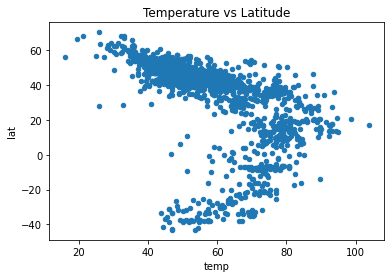

In [28]:
#temp vs lat
ax1 = weatherData.plot.scatter(x = "temp",y = "lat")
ax1.set_title("Temperature vs Latitude")

# this analysis the comparison of temperature and latitide

Text(0.5, 1.0, 'Humidity vs Latitude')

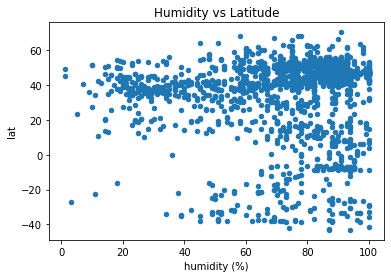

In [29]:
#hum vs lat
ax2 = weatherData.plot.scatter(x = "humidity (%)", y = "lat")
ax2.set_title("Humidity vs Latitude")

# this analysis the comparison of humidity and latitude

Text(0.5, 1.0, 'cloudiness vs latitude')

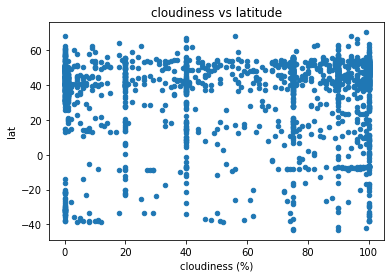

In [30]:
#cloudiness vs lat
ax3= weatherData.plot.scatter(x = "cloudiness (%)", y="lat")
ax3.set_title("cloudiness vs latitude")

# this analysis the comparison of cloudiness vs latitude

Text(0.5, 1.0, 'winspeed vs lat')

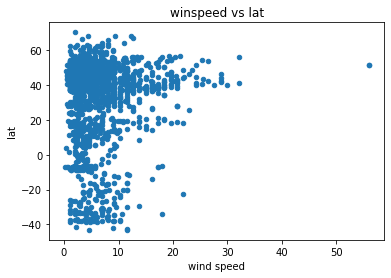

In [31]:
#winspeed vs lat
ax4 = weatherData.plot.scatter(x = "wind speed", y = "lat")
ax4.set_title("winspeed vs lat")

# this analysis the comparison of windspeed vs latitude

In [32]:
#splitting data into above and below equator
northernCities = weatherData.loc[weatherData["lat"] >= 0, :]
southernCities = weatherData.loc[weatherData["lat"] < 0 , :]


<function matplotlib.pyplot.show(close=None, block=None)>

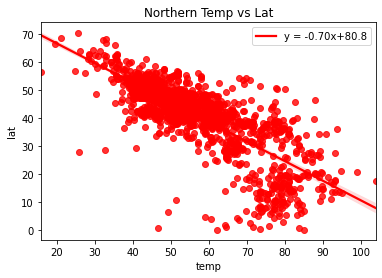

In [33]:
#temp vs lat Northern
#Nax1 = sns.lmplot(x="temp", y ="lat", data = northernCities, fit_reg = True)
slope, intercept, r_value, p_value, std_err = stats.linregress(northernCities['temp'],northernCities['lat'])

Nax1 = sns.regplot(x="temp", y = "lat", data=northernCities, color="r", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Nax1.legend()
Nax1.set_title("Northern Temp vs Lat")
plt.savefig("Nax1.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

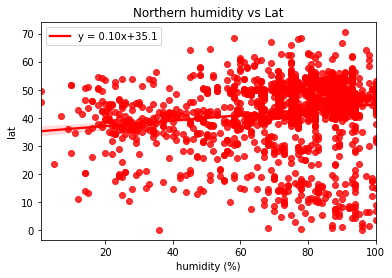

In [34]:
#Humid vs lat Northern
slope, intercept, r_value, p_value, std_err = stats.linregress(northernCities['humidity (%)'],northernCities['lat'])

Nax2 = sns.regplot(x="humidity (%)", y = "lat", data=northernCities, color="r", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Nax2.legend()
Nax2.set_title("Northern humidity vs Lat")
plt.savefig("Nax2.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

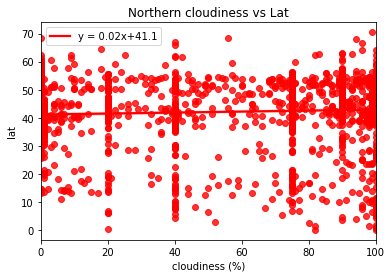

In [35]:
#Clouds vs lat Northern
slope, intercept, r_value, p_value, std_err = stats.linregress(northernCities['cloudiness (%)'],northernCities['lat'])

Nax3 = sns.regplot(x="cloudiness (%)", y = "lat", data=northernCities, color="r", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Nax3.legend()
Nax3.set_title("Northern cloudiness vs Lat")
plt.savefig("Nax3.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

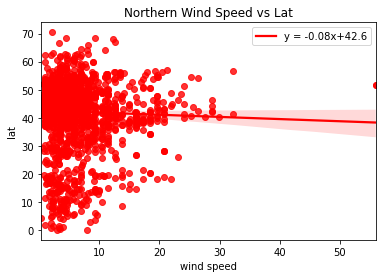

In [36]:
#WindSpeed vs lat Northern
slope, intercept, r_value, p_value, std_err = stats.linregress(northernCities['wind speed'],northernCities['lat'])

Nax4 = sns.regplot(x="wind speed", y = "lat", data=northernCities, color="r", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Nax4.legend()
Nax4.set_title("Northern Wind Speed vs Lat")
plt.savefig("Nax4.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

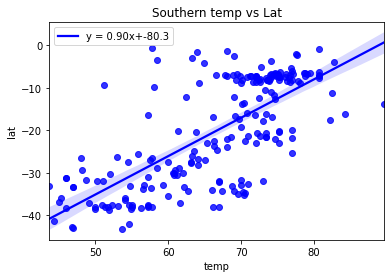

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(southernCities['temp'],southernCities['lat'])

Sax1 = sns.regplot(x="temp", y = "lat", data=southernCities, color="b", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Sax1.legend()
Sax1.set_title("Southern temp vs Lat")
plt.savefig("Sax1.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

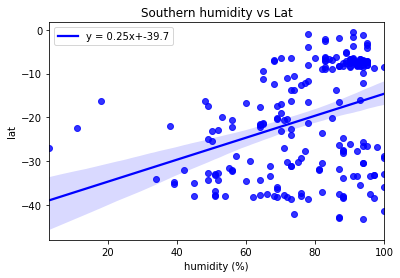

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(southernCities['humidity (%)'],southernCities['lat'])

Sax2 = sns.regplot(x="humidity (%)", y = "lat", data=southernCities, color="b", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Sax2.legend()
Sax2.set_title("Southern humidity vs Lat")
plt.savefig("Sax2.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

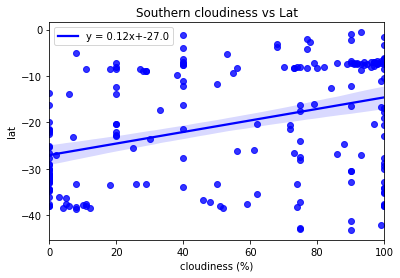

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(southernCities['cloudiness (%)'],southernCities['lat'])

Sax3 = sns.regplot(x="cloudiness (%)", y = "lat", data=southernCities, color="b", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Sax3.legend()
Sax3.set_title("Southern cloudiness vs Lat")
plt.savefig("Sax3.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

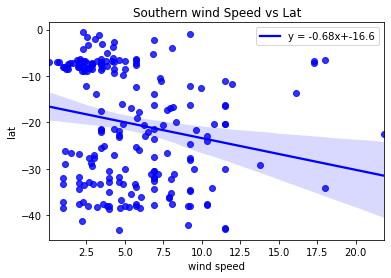

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(southernCities['wind speed'],southernCities['lat'])

Sax4 = sns.regplot(x="wind speed", y = "lat", data =southernCities, color="b", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
Sax4.legend()
Sax4.set_title("Southern wind Speed vs Lat")
plt.savefig("Sax4.png")
plt.show

In [65]:
locations = weatherData[["lat", "lon"]]
humidity = weatherData["humidity (%)"]



In [67]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = humidity,
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [77]:
#creating ideal weather condition submap

idealWeather = weatherData.loc[weatherData["temp"] > 75, :]
idealWeather = idealWeather.loc[idealWeather["temp"] < 85, :]
idealWeather = idealWeather.loc[idealWeather["cloudiness (%)"] < 15, :]
idealWeather = idealWeather.loc[idealWeather["humidity (%)"] < 25, :]
idealWeather = idealWeather.loc[idealWeather["wind speed"] <  10, :]

idealWeather.reset_index()



,index,city,lat,lon,temp,humidity (%),wind speed,cloudiness (%)
0,44,Larnaca,34.9167,33.6292,77.49,21,9.22,0
1,918,Adams,39.8667,-104.3839,75.96,24,1.36,0
2,950,Randolph,39.4334,-92.5005,77.36,21,4.61,1
3,1383,Brooks Mill,41.2793,-120.3108,77.00,13,6.91,1
4,1850,Liberty,39.2461,-94.4191,79.54,21,5.75,1
5,1999,Moville,42.4889,-96.0725,77.88,19,6.91,1


In [91]:
hotels = []

for i in idealWeather.index:
    lat = idealWeather.loc[i]["lat"]
    lon = idealWeather.loc[i]["lon"]
    
   
    url1 = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location=-{lat},{lon}&radius=5000&types=hotel&key={gkey}"
    
    response = requests.get(url1).json()
    hotels.append(response["results"]['adress_components']["long_name"])
    

    
idealWeather["hotel"] = hotels
idealWeather

TypeError: list indices must be integers or slices, not str